# By Winona
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import os

In [26]:
# Cargar los datos
file = os.path.abspath('../data/bywinona_reviews.csv')
df = pd.read_csv(file)
df

,date,info by,author_name,author_location,type of review,title,rated,time_posted,paragraph,date_of_experience,reply_author,reply_date,reply_paragraph
0,2024-09-12 19:29:01,Info for Courtney Coleman,Courtney Coleman,US,Verified,Loving my new journey,5.0,2024-09-12T15:07:05.000Z,I know that this journey is different for ever...,12 September 2024,NaN,NaN,NaN
1,2024-09-12 19:29:01,Info for Lmegk,Lmegk,US,Verified,Quality of Life,5.0,2024-09-11T05:02:27.000Z,The whole experience has been amazing. My meno...,10 September 2024,Reply from By Winona,2024-09-11T09:06:22.000Z,Thank you so much for sharing your heartfelt e...
2,2024-09-12 19:29:01,Info for AS,AS,US,Verified,very good experience,4.0,2024-09-11T14:05:33.000Z,very good experience. The website is a little ...,05 September 2024,Reply from By Winona,2024-09-12T08:31:34.000Z,Thank you for sharing your feedback! We're gla...
3,2024-09-12 19:29:01,Info for Holly Hernandez,Holly Hernandez,US,Verified,I Been with Winona for three months,5.0,2024-09-11T16:45:24.000Z,I Been with Winona for three months And I feel...,04 September 2024,Reply from By Winona,2024-09-12T08:38:24.000Z,Thank you so much for sharing your incredible ...
4,2024-09-12 19:29:01,Info for Jenny Perez,Jenny Perez,US,Verified,Life changing,5.0,2024-09-11T00:47:20.000Z,I was having constant hot flashes all day. I w...,10 September 2024,Reply from By Winona,2024-09-11T09:04:32.000Z,Thank you so much for sharing your journey! It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2024-09-12 19:31:50,Info for Hannah Lebowitz,Hannah Lebowitz,US,NaN,Stick with it!,5.0,2022-01-30T03:08:49.000Z,This is the best company ever. I was skeptical...,30 January 2022,NaN,NaN,NaN
2392,2024-09-12 19:31:50,Info for Heather Nickell,Heather Nickell,US,NaN,Winona is just what I was looking for,5.0,2022-01-26T19:35:12.000Z,Winona is just what I was looking for: help wi...,26 January 2022,NaN,NaN,NaN
2393,2024-09-12 19:31:50,Info for Michele Farrar,Michele Farrar,US,NaN,Excellent customer service!,5.0,2022-01-25T12:05:36.000Z,I would like to say that since starting the cr...,25 January 2022,NaN,NaN,NaN
2394,2024-09-12 19:31:50,Info for Cheri,Cheri,US,NaN,I found this website so educational,5.0,2021-05-23T20:43:12.000Z,I found this website so educational and user f...,23 May 2021,NaN,NaN,NaN


In [27]:
# Convertir columnas de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])
df['time_posted'] = pd.to_datetime(df['time_posted'])
df['date_of_experience'] = pd.to_datetime(df['date_of_experience'], format='%d %B %Y') 
# df['date_of_experience'] = pd.to_datetime(df['date_of_experience'], format='%B %d, %Y')

# Rellenar valores nulos
# df['paragraph'].fillna('', inplace=True)
# df['reply_paragraph'].fillna('', inplace=True)

# Normalizar datos
df['author_location'] = df['author_location'].str.upper()
df['rated'] = df['rated'].astype(float)

***

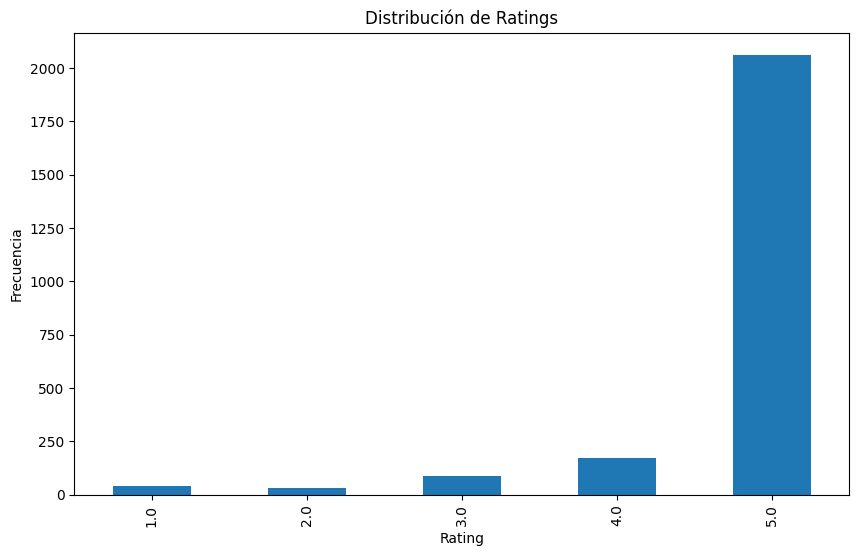

In [28]:
# Análisis de la distribución de ratings
plt.figure(figsize=(10, 6))
df['rated'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

***

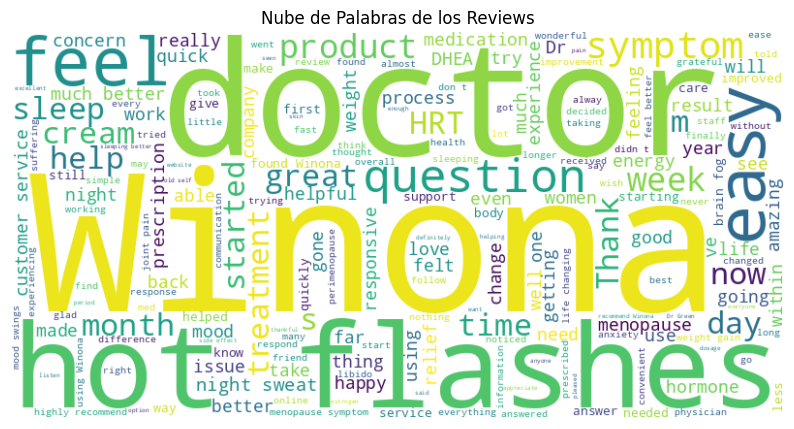

In [29]:
# Análisis de frecuencia de palabras
# rev_paragraph = df['paragraph'].fillna('', inplace=False)
# all_text = ' '.join(rev_paragraph)
all_text = ' '.join(df['paragraph'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Reviews')
plt.show()
plt.close()

***

/tmp/ipykernel_176243/1813373493.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ratings = df['rated'].resample('M').mean()


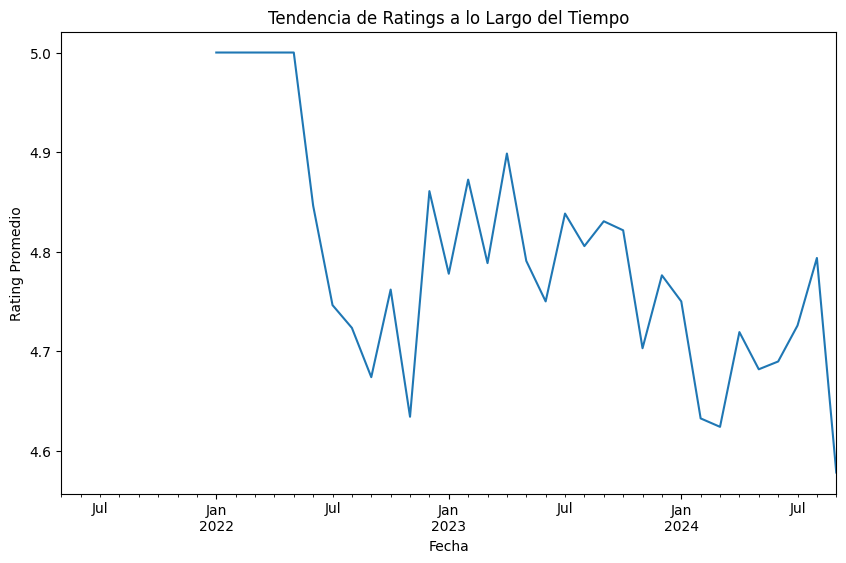

In [30]:
# Tendencias temporales
df.set_index('time_posted', inplace=True)
monthly_ratings = df['rated'].resample('M').mean()
plt.figure(figsize=(10, 6))
monthly_ratings.plot(kind='line')
plt.title('Tendencia de Ratings a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.show()
plt.close()

***

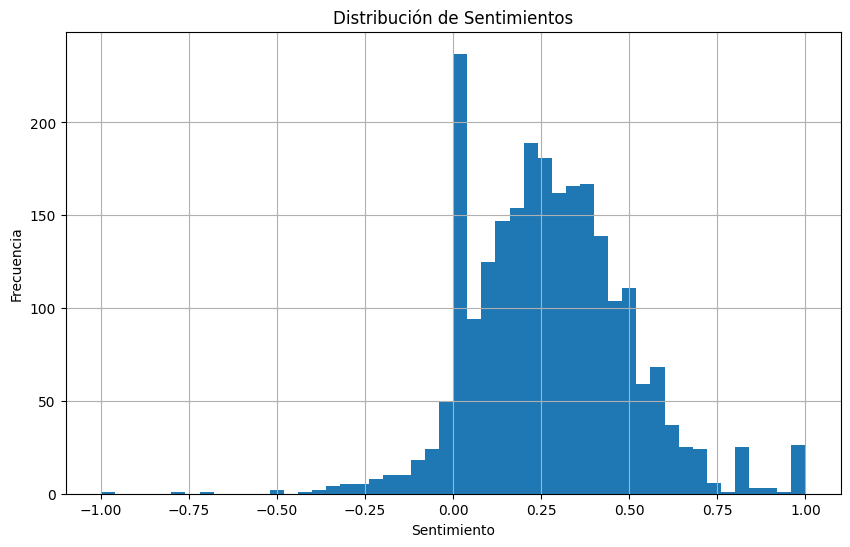

In [34]:
# Análisis de sentimientos
df['sentiment'] = df['paragraph'].fillna('', inplace=False).apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=50)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

## Análisis de la Gráfica
***

### Eje X (Sentimiento):
La escala va de -1.0 a 1.0.
* -1.0 representa un sentimiento extremadamente negativo.
* 0.0 representa un sentimiento neutral.
* 1.0 representa un sentimiento extremadamente positivo.

### Eje Y (Frecuencia):
Muestra la cantidad de reviews que caen en cada rango de sentimiento.
La frecuencia varía desde 0 hasta más de 25.

### Observaciones


### Interpretación
* **Neutralidad**: La alta concentración alrededor de 0.0 sugiere que muchos usuarios tienen opiniones neutrales sobre el servicio.
* **Polarización Baja**: La baja frecuencia en los extremos (-1.0 y 1.0) indica que pocos usuarios tienen opiniones extremadamente negativas o positivas.

### Siguientes Pasos

* Análisis Detallado: Investigar qué aspectos específicos del servicio generan sentimientos positivos o negativos.
* Segmentación: Analizar los sentimientos por diferentes segmentos, como fechas, tipos de reviews, o ubicaciones de los autores.

In [9]:
# Análisis de sentimientos
df['sentiment'] = df['paragraph'].fillna('', inplace=False).apply(lambda x: TextBlob(x).sentiment.polarity)

# Filtrar reviews positivos y negativos
positive_reviews = df[df['sentiment'] > 0]['paragraph']
negative_reviews = df[df['sentiment'] < 0]['paragraph']

# Generar nubes de palabras para reviews positivos y negativos
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

### Nube de Palabras de Reviews Positivos

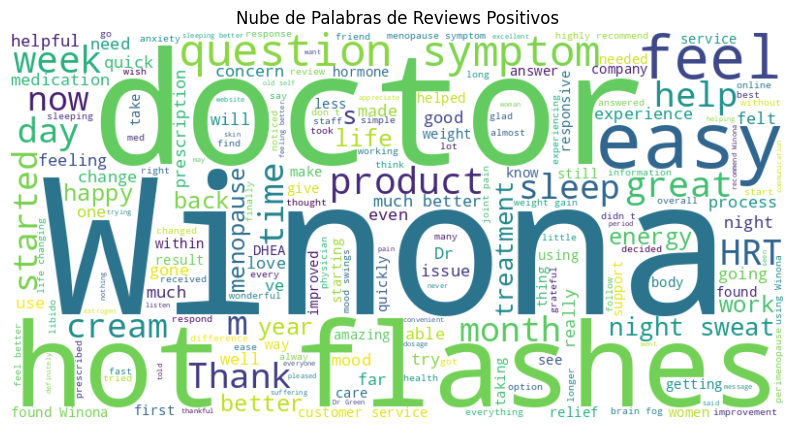

In [10]:
# Mostrar nubes de palabras
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reviews Positivos')
plt.show()
plt.close()

### Nube de Palabras de Reviews Negativos

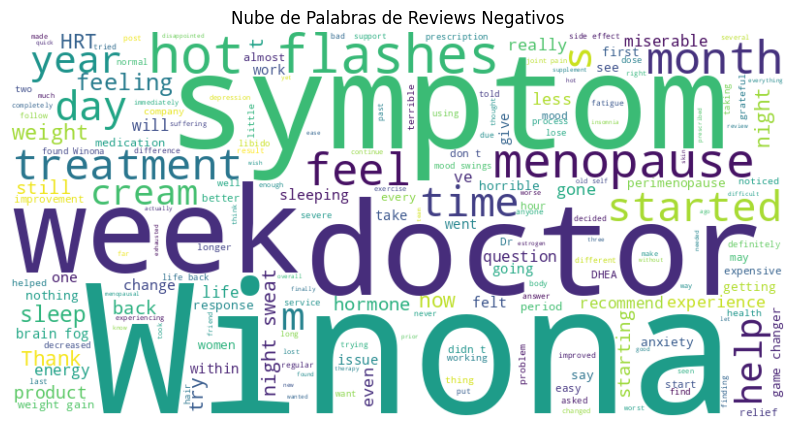

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reviews Negativos')
plt.show()
plt.close()

***

## Diferencia en Tiempo entre la Respuesta y el Comentario

In [15]:
df['reply_date'] = pd.to_datetime(df['reply_date'])

# Calcular la diferencia en días entre el comentario y la respuesta
df['response_time'] = (df['reply_date'] - df['time_posted']).dt.days #type: ignore

# Mostrar las primeras filas para verificar
df[['time_posted', 'reply_date', 'response_time']]

,time_posted,reply_date,response_time
0,2024-09-12 15:07:05+00:00,NaT,NaN
1,2024-09-11 05:02:27+00:00,2024-09-11 09:06:22+00:00,0.0
2,2024-09-11 14:05:33+00:00,2024-09-12 08:31:34+00:00,0.0
3,2024-09-11 16:45:24+00:00,2024-09-12 08:38:24+00:00,0.0
4,2024-09-11 00:47:20+00:00,2024-09-11 09:04:32+00:00,0.0


In [ ]:
# Filtrar filas donde response_time es mayor a 0
filtered_df = df[df['response_time'] > 0]

# Visualizar las columnas deseadas
filtered_df[['time_posted', 'reply_date', 'response_time']]

,time_posted,reply_date,response_time
34,2024-08-30 18:02:32+00:00,2024-09-05 16:28:13+00:00,5.0
39,2024-08-17 17:52:55+00:00,2024-08-20 15:30:09+00:00,2.0
53,2024-08-13 17:59:53+00:00,2024-08-15 16:05:59+00:00,1.0
57,2024-08-12 23:30:09+00:00,2024-08-15 16:41:19+00:00,2.0
60,2024-08-12 17:50:27+00:00,2024-08-15 17:04:00+00:00,2.0
...,...,...,...
253,2024-04-10 19:49:10+00:00,2024-04-17 19:59:56+00:00,7.0
255,2024-03-26 17:15:37+00:00,2024-04-01 13:58:09+00:00,5.0
256,2024-03-23 16:04:02+00:00,2024-04-01 13:56:52+00:00,8.0
266,2024-03-05 12:31:21+00:00,2024-03-06 14:28:34+00:00,1.0


# Análisis de las Palabras Utilizadas en las Respuestas de la Clínica

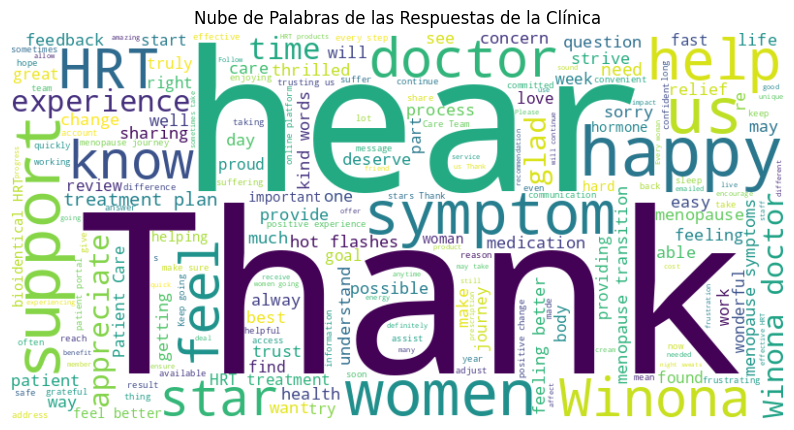

In [16]:
# Unir todos los textos de las respuestas
all_reply_text = ' '.join(df['reply_paragraph'].dropna())

# Generar la nube de palabras
reply_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reply_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(reply_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Respuestas de la Clínica')
plt.show()
plt.close()

# Insights Adicionales

Podemos obtener insights adicionales sobre la interacción entre clientes y la clínica, como la proporción de comentarios que reciben respuesta y el sentimiento de las respuestas.

Proporción de comentarios que reciben respuesta: 58.56%


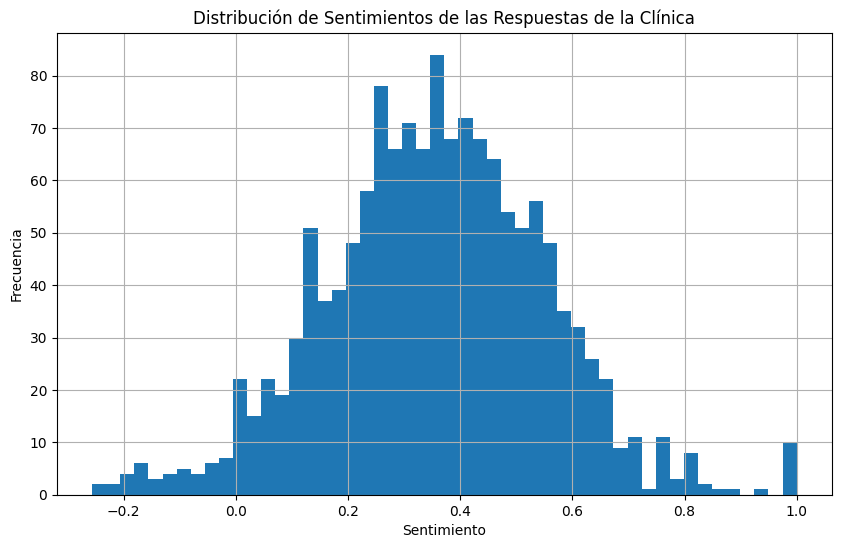

In [33]:
# Proporción de comentarios que reciben respuesta
response_rate = df['reply_paragraph'].notna().mean()
print(f"Proporción de comentarios que reciben respuesta: {response_rate:.2%}")

# Análisis de sentimientos de las respuestas
df['reply_sentiment'] = df['reply_paragraph'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else None)

# Mostrar la distribución de sentimientos de las respuestas
plt.figure(figsize=(10, 6))
df['reply_sentiment'].dropna().hist(bins=50)
plt.title('Distribución de Sentimientos de las Respuestas de la Clínica')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

***

# Análisis de Títulos de Reviews

## Código para Análisis de Frecuencia de Palabras en los Títulos

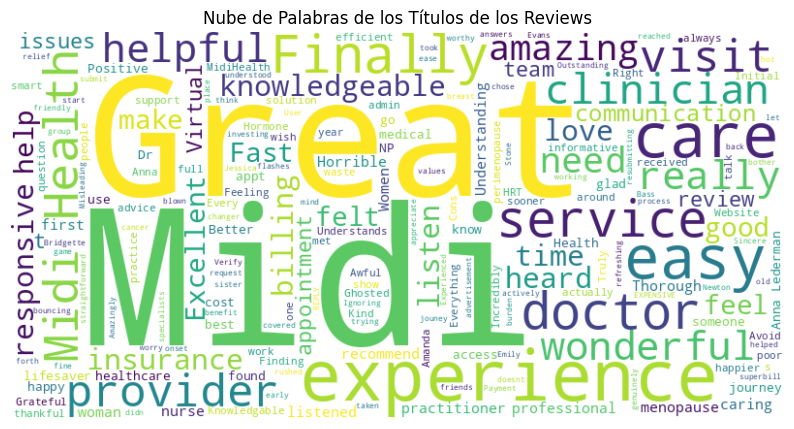

In [ ]:
# Unir todos los títulos de los reviews
all_titles = ' '.join(df['title'].dropna())

# Generar la nube de palabras
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos de los Reviews')
plt.show()
plt.close()

## Relación entre el Título y el Sentimiento

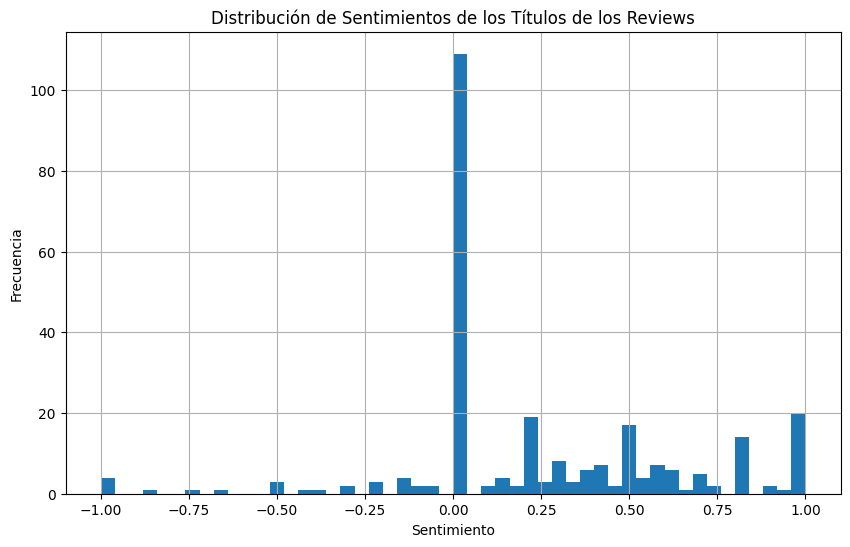

In [ ]:
# Calcular el sentimiento de los títulos
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else None)

# Mostrar la distribución de sentimientos de los títulos
plt.figure(figsize=(10, 6))
df['title_sentiment'].dropna().hist(bins=50)
plt.title('Distribución de Sentimientos de los Títulos de los Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()